# Predicting The Costs Of Used Cars - Hackathon By Imarticus Learning

Size of training set: 6,019 records

Size of test set: 1,234 records

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
# read train dataset
train=pd.read_excel('C:/Users/Admin/Downloads/Data_Train.xlsx')
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
# read test data
test=pd.read_excel('C:/Users/Admin/Downloads/Data_Test.xlsx')
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [4]:
# checking null values
train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
test.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [6]:
# how many cities
train['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

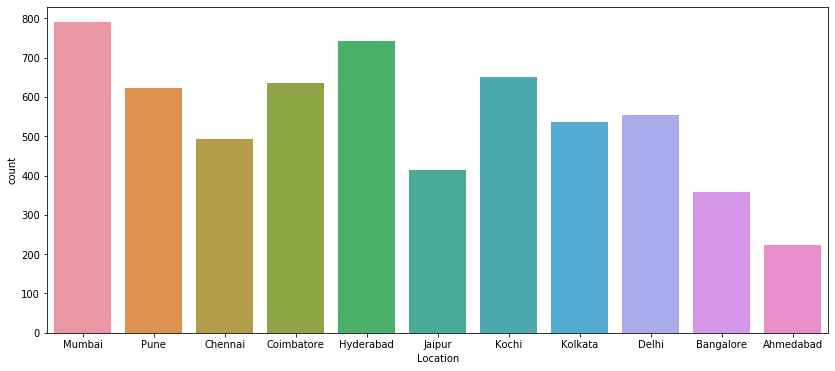

In [7]:
plt.figure(figsize=(14,6))
sns.countplot(train['Location'])

In [8]:
# how many types of fuel:
train['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

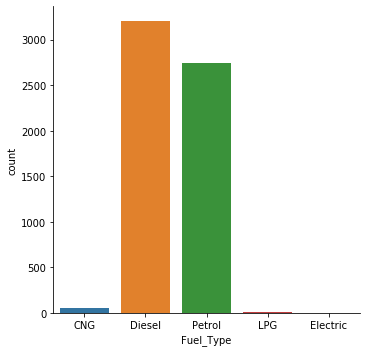

In [9]:
sns.catplot(x='Fuel_Type',kind = "count",data=train)

Text(0.5, 1.0, 'box plot of Fuel_Type vs Year')

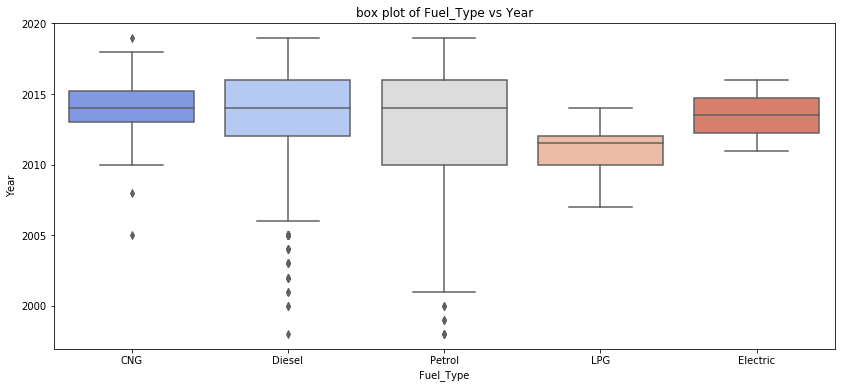

In [10]:
# box plot of Year vs Fuel_Type:
plt.figure(figsize=(14,6))
sns.boxplot(x='Fuel_Type', y='Year',data=train,palette='coolwarm')
plt.title('box plot of Fuel_Type vs Year')

In [11]:
train['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

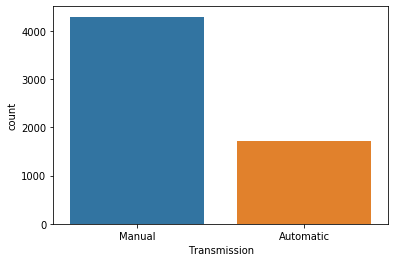

In [12]:
sns.countplot(train['Transmission'])

In [13]:
train['Mileage'].head()

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: Mileage, dtype: object

In [14]:
train['Power'].value_counts().head()

74 bhp      235
98.6 bhp    131
73.9 bhp    125
140 bhp     123
78.9 bhp    111
Name: Power, dtype: int64

In [15]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [16]:
#DataCleaning
#1.) Feature column : Name - Separating the column as Brand and Model
#Training Set
names = list(train.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip()) 
# strip() for string operation it adjust speaces.
#If the optional chars parameter is not given, all leading 
#and trailing whitespaces are removed from the string.
       except:
           pass 
   except:
       print("ERR ! - ", names[i], "@" , i)
train["Brand"] =  brand
train["Model"] = model
train.drop(labels = ['Name'], axis = 1, inplace = True)

In [17]:
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


In [18]:
#Test Set data cleaning for Name Column
names = list(test.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
test["Brand"] =  brand
test["Model"] = model
test.drop(labels = ['Name'], axis = 1, inplace = True)

In [19]:
test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Model
0,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,Maruti,Alto K10 LXI CNG
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,Maruti,Alto 800 2016-2019 LXI
2,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,Toyota,Innova Crysta Touring Sport 2.4 MT
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,Toyota,Etios Liva GD
4,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,Hyundai,i20 Magna


In [20]:
train['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Bentley             1
Lamborghini         1
Smart               1
Ambassador          1
Name: Brand, dtype: int64

In [21]:
#Feature Column : Mileage
#""" Removing the  mileage units"""

# Training Set
train.Mileage = train.Mileage.fillna(0)
mileage = list(train.Mileage)

In [22]:
for i in range(len(mileage)):
    mileage[i] = str(mileage[i]).split(" ")[0].strip()
train['Mileage'] = mileage
train['Mileage'] = train['Mileage'].astype(float)

In [23]:
train['Mileage'].head()

0    26.60
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage, dtype: float64

In [24]:
#Feature Column : Mileage
#""" Removing the  mileage units"""

# Testing Set
test.Mileage = test.Mileage.fillna(0)
mileage = list(test.Mileage)
for i in range(len(mileage)):
    mileage[i] = str(mileage[i]).split(" ")[0].strip()
test['Mileage'] = mileage
test['Mileage'] = test['Mileage'].astype(float)



In [25]:
#Dropping Feature/Column : New_Price as it has many NaN
train.drop(labels = ['New_Price'], axis = 1, inplace = True)
test.drop(labels = ['New_Price'], axis = 1, inplace = True)

In [26]:
train.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
Model                 0
dtype: int64

In [27]:
#Feature Column : Engine
#""" Removing the  Engine units"""

# Training Set
train.Engine =train.Engine.fillna(0)
engine = list(train .Engine)
for i in range(len(engine)):
    engine[i] = str(engine[i]).split(" ")[0].strip()
train['Engine'] = engine
train['Engine'] =train['Engine'].astype(int)
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16 bhp,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7 bhp,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8 bhp,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [28]:
#Feature Column : Engine
#""" Removing the  Engine units"""

# Testing Set
test.Engine = test.Engine.fillna(0)
engine = list(test.Engine)
for i in range(len(engine)):
    engine[i] = str(engine[i]).split(" ")[0].strip()
test['Engine'] = engine
test['Engine'] = test['Engine'].astype(int)

In [29]:
test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2 bhp,4.0,Maruti,Alto K10 LXI CNG
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796,47.3 bhp,5.0,Maruti,Alto 800 2016-2019 LXI
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8 bhp,7.0,Toyota,Innova Crysta Touring Sport 2.4 MT
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null bhp,5.0,Toyota,Etios Liva GD
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197,82.85 bhp,5.0,Hyundai,i20 Magna


In [30]:
#Feature Column : Power
#""" Removing the  Power units"""

# Training Set
train.Power = train.Power.fillna(0.0)
power = list(train.Power)
for i in range(len(power)):
    power[i] = str(power[i]).split(" ")[0].strip()
train['Power'] = power


In [31]:
#Feature Column : Power
#""" Removing the  Power units"""

# Testing Set
test.Power = test.Power.fillna(0.0)
power = list(test.Power)
for i in range(len(power)):
    power[i] = str(power[i]).split(" ")[0].strip()
test['Power'] = power


In [32]:
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


Text(0.5, 1.0, 'box plot of Fuel_Type vs Year')

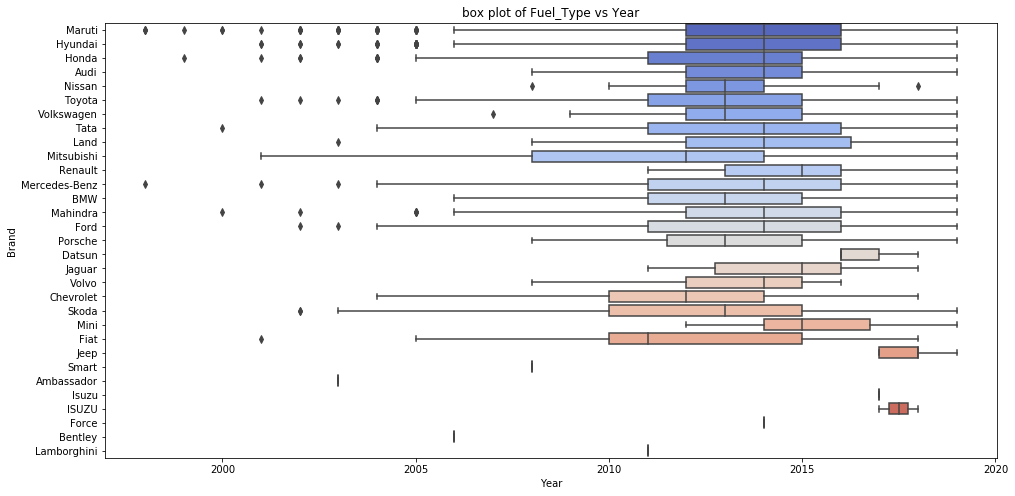

In [33]:
# box plot of charges vs children:
plt.figure(figsize=(16,8))
sns.boxplot(x='Year', y='Brand',data=train,palette='coolwarm')
plt.title('box plot of Fuel_Type vs Year')

In [34]:
#'Brand', 'Model', 'Location','Fuel_Type', 'Transmission', 'Owner_Type'

all_brands = list(set(list(train.Brand) + list(test.Brand)))
all_models = list(set(list(train.Model) + list(test.Model)))
all_locations = list(set(list(train.Location) + list(test.Location)))
all_fuel_types = list(set(list(train.Fuel_Type) + list(test.Fuel_Type)))
all_transmissions = list(set(list(train.Transmission) + list(test.Transmission)))
all_owner_types = list(set(list(train.Owner_Type) + list(test.Owner_Type)))

In [35]:
#Initializing label encoders
from sklearn.preprocessing import LabelEncoder
le_brands = LabelEncoder()
le_models = LabelEncoder()
le_locations = LabelEncoder()
le_fuel_types = LabelEncoder()
le_transmissions = LabelEncoder()
le_owner_types = LabelEncoder()

In [36]:


#Fitting the categories
le_brands.fit(all_brands)
le_models.fit(all_models)
le_locations.fit(all_locations)
le_fuel_types.fit(all_fuel_types)
le_transmissions.fit(all_transmissions)
le_owner_types.fit(all_owner_types)

LabelEncoder()

In [37]:

#Applying encoding to Training_set data
train['Brand'] = le_brands.transform(train['Brand'])
train['Model'] = le_models.transform(train['Model'])
train['Location'] = le_locations.transform(train['Location'])
train['Fuel_Type'] = le_fuel_types.transform(train['Fuel_Type'])
train['Transmission'] = le_transmissions.transform(train['Transmission'])
train['Owner_Type'] = le_owner_types.transform(train['Owner_Type'])

In [38]:
#Applying encoding to Test_set data
test['Brand'] = le_brands.transform(test['Brand'])
test['Model'] = le_models.transform(test['Model'])
test['Location'] = le_locations.transform(test['Location'])
test['Fuel_Type'] = le_fuel_types.transform(test['Fuel_Type'])
test['Transmission'] = le_transmissions.transform(test['Transmission'])
test['Owner_Type'] = le_owner_types.transform(test['Owner_Type'])

In [39]:
#Re-ordering the columns
train = train[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]
test= test[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

In [40]:
train.isnull().sum()

Brand                 0
Model                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
Price                 0
dtype: int64

In [41]:
print('Percent of missing "Seats" records is %.2f%%' %((train['Seats'].isnull().sum()/train.shape[0])*100))

Percent of missing "Seats" records is 0.70%


In [42]:
print(train['Seats'].median())
print(train['Seats'].mean())


5.0
5.278735151413753


In [43]:
train['Seats'] = train['Seats'].fillna(train['Seats'].median())
train.isnull().sum()

Brand                0
Model                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [44]:
test.isnull().sum()

Brand                 0
Model                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                11
dtype: int64

In [45]:
test['Seats'] = test['Seats'].fillna(test['Seats'].median())
test.isnull().sum()

Brand                0
Model                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [46]:
train.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,19,1797,9,2010,72000,0,1,0,26.60,998,58.16,5.0,1.75
1,11,498,10,2015,41000,1,1,0,19.67,1582,126.2,5.0,12.50
2,10,993,2,2011,46000,4,1,0,18.20,1199,88.7,5.0,4.50
3,19,676,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00
4,1,105,3,2013,40670,1,0,2,15.20,1968,140.8,5.0,17.74
